In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'stixgeneral'
import numpy as np

import camb

In [2]:
lm = 5000

In [3]:
def get_lensing_camb(_ombh2, _omch2, _As):
    pars = camb.set_params(ombh2 = _ombh2, omch2 = _omch2, H0 = 67.4, As=np.exp(_As)/(1e10), lmax=lm)
    results = camb.get_results(pars)
    powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')
    lensed = powers['total'][2:lm, 0]
    unlensed = powers['unlensed_total'][2:lm, 0]
    return lensed/unlensed

In [5]:
_as = [ 1.7, 3.043, 3.5,  1.7, 3.043, 3.5,  1.7, 3.043, 3.5,  1.7, 3.043, 3.5]
_ombs = [0.0224,0.0224,0.0224,0.0224,0.0224,0.0224,0.0224,0.0224,0.0224,0.0224,0.0224,0.0224,]
_omcs = [0.07,0.07,0.07,0.15,0.15,0.15,0.21,0.21,0.21,0.23,0.23,0.23]
ells = np.array([l for l in range(2, lm)])
n = len(_as)
lensings_camb = [get_lensing_camb(_ombs[i], _omcs[i],_as[i]) for i in range(n)]
label_key = ["$A_s$ = " + str(_as[i]) for i in range(n)]
fid_ombh2 = 0.0224
fid_omch2 = 0.12

In [8]:
def lensing_tail_fit(ell, ombh2, omch2, a):
    x2 = (ombh2 + omch2)/(fid_omch2 + fid_ombh2) - 1
    x1 = ombh2/fid_ombh2 -1
    x5 = a / 3.043 - 1
        
    beta_1 = 0.6838 * (1 + -0.14316  * x2  + 0.21621 * x2**2 + 0.39298564 * x1 + 0.78419961  * x1**2 + 0.00295 * x5 + 0.0772 * x5**2) 
    beta_2 = 2803.1562 * (1 + -0.1925  * x2 + 0.33984  * x2**2 + 0.31718478 * x1 + 0.37792516 * x1 **2 +0.01288  * x5 + -0.1299 * x5**2) 
    
    beta_3 = 3752.098 * (1 + -0.49117 * x2 + 0.3637 * x2**2 + 0.40180848   * x1 + -0.21222079 * x1**2 + -0.1017 * x5 + 0.1915  * x5**2) 
    beta_4 = 407.009 * (1 + -0.879 * x2 + -0.3132 *x2**2 + 1.03673054 * x1 + 0.92216036  * x1**2 + 0.5307 * x5 + 0.1483 * x5**2) 
    alpha = 2.5867 *(1 + 0.7702 * x2 + 0.3882 * x2 **2 + -1.17729283 * x1 + 0.27630538   * x1**2 + 1.4088  * x5 + 0.7482    * x5**2)
        
    sigm = (1 + np.exp(-(ell-beta_3)/beta_4))**(-1)

    poly = (beta_1*(ell/beta_2)**alpha - 1)
    
    L = poly*sigm + 1
    
    return L

In [9]:
lensings_fit = [lensing_tail_fit(ells, _ombs[i], _omcs[i],_as[i]) for i in range(n)]

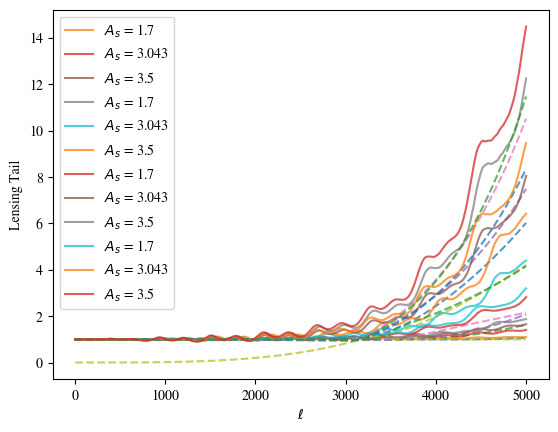

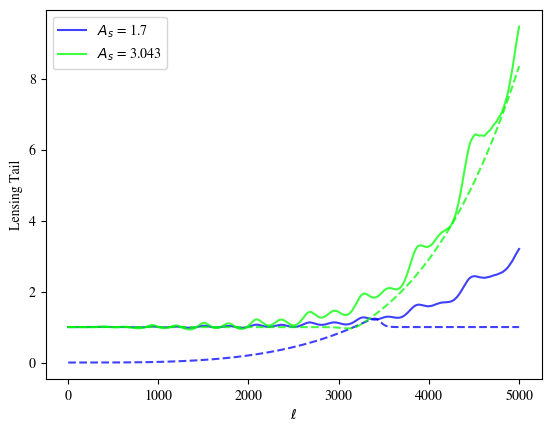

In [18]:
color_key = ["brown","gold","darkmagenta", "pink", "darkgreen", "aqua", "slateblue", "palegreen", "crimson", "blue", "lime"]
for i in range(n):
    plt.plot(ells, lensings_fit[i], linestyle = "dashed", alpha = 0.75)
    plt.plot(ells, lensings_camb[i],  label = label_key[i], alpha = 0.75)
plt.xlabel("$\\ell$")
plt.ylabel("Lensing Tail")
#plt.ylim(0.9,3)
plt.legend()
plt.show()
for i in [9,10]: 
    plt.plot(ells, lensings_fit[i], color = color_key[i], linestyle = "dashed", alpha = 0.75)
    plt.plot(ells, lensings_camb[i], color = color_key[i], label = label_key[i], alpha = 0.75)
plt.legend()
plt.xlabel("$\\ell$")
plt.ylabel("Lensing Tail")
plt.show()